## Question 3

In [9]:
"""
Instruction:

In this section, you are asked to train a NN with different hyperparameters.
To start with training, you need to fill in the incomplete code. There are 3
places that you need to complete:
a) Backward pass equations for an affine layer (linear transformation + bias).
b) Backward pass equations for ReLU activation function.
c) Weight update equations with momentum.

After correctly fill in the code, modify the hyperparameters in "main()".
You can then run this file with the command: "python nn.py" in your terminal.
The program will automatically check your gradient implementation before start.
The program will print out the training progress, and it will display the
training curve by the end. You can optionally save the model by uncommenting
the lines in "main()".
"""

from __future__ import division
from __future__ import print_function

from util import LoadData, Load, Save, DisplayPlot
import sys
import numpy as np

In [10]:
def InitNN(num_inputs, num_hiddens, num_outputs):
    """Initializes NN parameters.

    Args:
        num_inputs:    Number of input units.
        num_hiddens:   List of two elements, hidden size for each layer.
        num_outputs:   Number of output units.

    Returns:
        model:         Randomly initialized network weights.
    """
    W1 = 0.1 * np.random.randn(num_inputs, num_hiddens[0])
    W2 = 0.1 * np.random.randn(num_hiddens[0], num_hiddens[1])
    W3 = 0.01 * np.random.randn(num_hiddens[1], num_outputs)
    b1 = np.zeros((num_hiddens[0]))
    b2 = np.zeros((num_hiddens[1]))
    b3 = np.zeros((num_outputs))
    model = {
        'V_w1': np.zeros((num_inputs, num_hiddens[0])),
        'V_w2': np.zeros(num_hiddens),
        'V_w3': np.zeros((num_hiddens[1], num_outputs)),
        'W1': W1,
        'W2': W2,
        'W3': W3,
        'b1': b1,
        'b2': b2,
        'b3': b3
    }
    return model

In [11]:
def Affine(x, w, b):
    """Computes the affine transformation.

    Args:
        x: Inputs (or hidden layers)
        w: Weights
        b: Bias

    Returns:
        y: Outputs
    """
    # y = np.dot(w.T, x) + b
    y = x.dot(w) + b
    return y

In [12]:
def AffineBackward(grad_y, h, w):
    """Computes gradients of affine transformation.
    hint: you may need the matrix transpose np.dot(A,B).T = np.dot(B,A) and (A.T).T = A

    Args:
        grad_y: gradient from last layer
        h: inputs from the hidden layer
        w: weights from last layer

    Returns:
        grad_h: Gradients wrt. the inputs/hidden layer.
        grad_w: Gradients wrt. the weights.
        grad_b: Gradients wrt. the biases.
    """
    # Insert your code here.
    grad_h = np.dot(grad_y, w.T)
    grad_w = np.dot(h.T, grad_y)
    grad_b = np.sum(grad_y, axis=0)
    return grad_h, grad_w, grad_b


In [13]:
def ReLU(z):
    """Computes the ReLU activation function.

    Args:
        z: Inputs

    Returns:
        h: Activation of z
    """
    return np.maximum(z, 0.0)

In [14]:
def ReLUBackward(grad_h, z):
    """Computes gradients of the ReLU activation function wrt. the unactivated inputs.

    Args:
        z: Inputs

    Returns:
        grad_z: Gradients wrt. the hidden state prior to activation.
    """
    grad_z = grad_h * (z > 0)
    return grad_z

In [90]:
def Softmax(x):
    """Computes the softmax activation function.

    Args:
        x: Inputs

    Returns:
        y: Activation
    """
    return np.exp(x) / np.exp(x).sum(axis=1, keepdims=True)

In [16]:
def NNForward(model, x):
    """Runs the forward pass.
var = {
    Args:
        model: Dictionary of all the weights.
        x:     Input to the network.

    Returns:
        var:   Dictionary of all intermediate variables.
    """
    z1 = Affine(x, model['W1'], model['b1'])
    h1 = ReLU(z1)
    z2 = Affine(h1, model['W2'], model['b2'])
    h2 = ReLU(z2)
    y = Affine(h2, model['W3'], model['b3'])
    var = {
        'x': x,
        'z1': z1,
        'h1': h1,
        'z2': z2,
        'h2': h2,
        'y': y
    }
    return var

In [17]:
def NNBackward(model, err, var):
    """Runs the backward pass.

    Args:
        model:    Dictionary of all the weights.
        err:      Gradients to the output of the network.
        var:      Intermediate variables from the forward pass.
    """
    dE_dh2, dE_dW3, dE_db3 = AffineBackward(err, var['h2'], model['W3'])
    dE_dz2 = ReLUBackward(dE_dh2, var['z2'])
    dE_dh1, dE_dW2, dE_db2 = AffineBackward(dE_dz2, var['h1'], model['W2'])
    dE_dz1 = ReLUBackward(dE_dh1, var['z1'])
    _, dE_dW1, dE_db1 = AffineBackward(dE_dz1, var['x'], model['W1'])
    model['dE_dW1'] = dE_dW1
    model['dE_dW2'] = dE_dW2
    model['dE_dW3'] = dE_dW3
    model['dE_db1'] = dE_db1
    model['dE_db2'] = dE_db2
    model['dE_db3'] = dE_db3
    pass

In [18]:
def NNUpdate(model, eps, momentum):
    """Update NN weights.

    Args:
        model:    Dictionary of all the weights.
        eps:      Learning rate.
        momentum: Momentum.
    """
    # Insert your code here.
    # Update velocities
    model['V_w1'] = momentum * model['V_w1'] + (1 - momentum) * model['dE_dW1']
    model['V_w2'] = momentum * model['V_w2'] + (1 - momentum) * model['dE_dW2']
    model['V_w3'] = momentum * model['V_w3'] + (1 - momentum) * model['dE_dW3']
    # Update the weights and biases.
    model['W1'] -= eps * model['V_w1']
    model['W2'] -= eps * model['V_w2']
    model['W3'] -= eps * model['V_w3']
    model['b1'] -= eps * model['dE_db1']
    model['b2'] -= eps * model['dE_db2']
    model['b3'] -= eps * model['dE_db3']

In [53]:
def Train(model, forward, backward, update, hypers, verbose=True, diagram=True):
    %matplotlib tk
    """Trains a simple MLP.

    Args:
        model:           Dictionary of model weights.
        forward:         Forward prop function.
        backward:        Backward prop function.
        update:          Update weights function.
        eps:             Learning rate.
        momentum:        Momentum.
        num_epochs:      Number of epochs to run training for.
        batch_size:      Mini-batch size, -1 for full batch.

    Returns:
        stats:           Dictionary of training statistics.
            - train_ce:       Training cross entropy.
            - valid_ce:       Validation cross entropy.
            - train_acc:      Training accuracy.
            - valid_acc:      Validation accuracy.
    """
    eps, momentum, num_epochs, batch_size = \
        hypers["eps"], hypers["momentum"], hypers["num_epochs"], hypers["batch_size"]
    inputs_train, inputs_valid, inputs_test, target_train, target_valid, \
        target_test = LoadData('./toronto_face.npz')
    rnd_idx = np.arange(inputs_train.shape[0])
    train_ce_list = []
    valid_ce_list = []
    train_acc_list = []
    valid_acc_list = []
    num_train_cases = inputs_train.shape[0]
    if batch_size == -1:
        batch_size = num_train_cases
    num_steps = int(np.ceil(num_train_cases / batch_size))
    for epoch in range(num_epochs):
        np.random.shuffle(rnd_idx)
        inputs_train = inputs_train[rnd_idx]
        target_train = target_train[rnd_idx]
        for step in range(num_steps):
            # Forward prop.
            start = step * batch_size
            end = min(num_train_cases, (step + 1) * batch_size)
            x = inputs_train[start: end]
            t = target_train[start: end]

            var = forward(model, x)
            prediction = Softmax(var['y'])

            train_ce = -np.sum(t * np.log(prediction)) / x.shape[0]
            train_acc = (np.argmax(prediction, axis=1) ==
                         np.argmax(t, axis=1)).astype('float').mean()
            if verbose:
                print(('Epoch {:3d} Step {:2d} Train CE {:.5f} '
                       'Train Acc {:.5f}').format(
                    epoch, step, train_ce, train_acc))

            # Compute error.
            error = (prediction - t) / x.shape[0]

            # Backward prop.
            backward(model, error, var)

            # Update weights.
            update(model, eps, momentum)

        valid_ce, valid_acc = Evaluate(
            inputs_valid, target_valid, model, forward, batch_size=batch_size)
        if verbose:
            print(('Epoch {:3d} '
                   'Validation CE {:.5f} '
                   'Validation Acc {:.5f}\n').format(
                epoch, valid_ce, valid_acc))
        train_ce_list.append((epoch, train_ce))
        train_acc_list.append((epoch, train_acc))
        valid_ce_list.append((epoch, valid_ce))
        valid_acc_list.append((epoch, valid_acc))
        if diagram:
            DisplayPlot(train_ce_list, valid_ce_list, 'Cross Entropy', number=0)
            DisplayPlot(train_acc_list, valid_acc_list, 'Accuracy', number=1)

    if verbose:
        print()
    train_ce, train_acc = Evaluate(
        inputs_train, target_train, model, forward, batch_size=batch_size)
    valid_ce, valid_acc = Evaluate(
        inputs_valid, target_valid, model, forward, batch_size=batch_size)
    test_ce, test_acc = Evaluate(
        inputs_test, target_test, model, forward, batch_size=batch_size)
    print('CE: Train %.5f Validation %.5f Test %.5f' %
          (train_ce, valid_ce, test_ce))
    print('Acc: Train {:.5f} Validation {:.5f} Test {:.5f}'.format(
        train_acc, valid_acc, test_acc))

    stats = {
        'train_ce': train_ce_list,
        'valid_ce': valid_ce_list,
        'train_acc': train_acc_list,
        'valid_acc': valid_acc_list
    }

    return model, stats

In [20]:
def Evaluate(inputs, target, model, forward, batch_size=-1):
    """Evaluates the model on inputs and target.

    Args:
        inputs: Inputs to the network.
        target: Target of the inputs.
        model:  Dictionary of network weights.
    """
    num_cases = inputs.shape[0]
    if batch_size == -1:
        batch_size = num_cases
    num_steps = int(np.ceil(num_cases / batch_size))
    ce = 0.0
    acc = 0.0
    for step in range(num_steps):
        start = step * batch_size
        end = min(num_cases, (step + 1) * batch_size)
        x = inputs[start: end]
        t = target[start: end]
        prediction = Softmax(forward(model, x)['y'])
        ce += -np.sum(t * np.log(prediction))
        acc += (np.argmax(prediction, axis=1) == np.argmax(
            t, axis=1)).astype('float').sum()
    ce /= num_cases
    acc /= num_cases
    return ce, acc

In [21]:
def CheckGrad(model, forward, backward, name, x):
    """Check the gradients

    Args:
        model: Dictionary of network weights.
        name: Weights name to check.
        x: Fake input.
    """
    np.random.seed(0)
    var = forward(model, x)
    loss = lambda y: 0.5 * (y ** 2).sum()
    grad_y = var['y']
    backward(model, grad_y, var)
    grad_w = model['dE_d' + name].ravel()
    w_ = model[name].ravel()
    eps = 1e-7
    grad_w_2 = np.zeros(w_.shape)
    check_elem = np.arange(w_.size)
    np.random.shuffle(check_elem)
    # Randomly check 20 elements.
    check_elem = check_elem[:20]
    for ii in check_elem:
        w_[ii] += eps
        err_plus = loss(forward(model, x)['y'])
        w_[ii] -= 2 * eps
        err_minus = loss(forward(model, x)['y'])
        w_[ii] += eps
        grad_w_2[ii] = (err_plus - err_minus) / 2 / eps
    np.testing.assert_almost_equal(grad_w[check_elem], grad_w_2[check_elem],
                                   decimal=3)

In [23]:
# Export name
model_fname = 'nn_model.npz'
stats_fname = 'nn_stats.npz'

In [141]:
# Setup hyperparameters
hyperparameters = {
    "num_hiddens": [16, 32],
    "eps": 0.1,
    "momentum": 0.0,
    "num_epochs": 1000,
    "batch_size": 100
}

In [142]:
# Input-output dimensions.
num_inputs = 2304
num_outputs = 7

# Initialize model.
model = InitNN(num_inputs, hyperparameters["num_hiddens"], num_outputs)

# Uncomment to reload trained model here.
# model = Load(model_fname)

# Check gradient implementation.
print('Checking gradients...')
x = np.random.rand(10, 48 * 48) * 0.1
CheckGrad(model, NNForward, NNBackward, 'W3', x)
CheckGrad(model, NNForward, NNBackward, 'b3', x)
CheckGrad(model, NNForward, NNBackward, 'W2', x)
CheckGrad(model, NNForward, NNBackward, 'b2', x)
CheckGrad(model, NNForward, NNBackward, 'W1', x)
CheckGrad(model, NNForward, NNBackward, 'b1', x)

Checking gradients...


## Q 3.1

#### Train with default parameters

CE: Train 0.72919 Validation 1.23030 Test 1.18131
Acc: Train 0.73681 Validation 0.65871 Test 0.63377


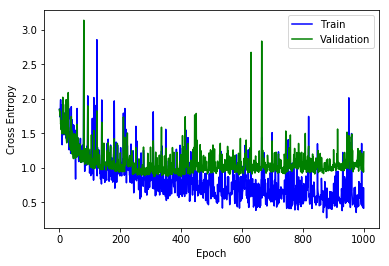

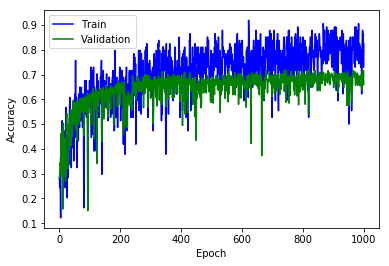

In [143]:
#Train model.
stats = Train(model, NNForward, NNBackward, NNUpdate, hyperparameters, verbose=False, diagram=False)
DisplayPlot(stats[1]['train_ce'], stats[1]['valid_ce'], 'Cross Entropy', number=0)
DisplayPlot(stats[1]['train_acc'], stats[1]['valid_acc'], 'Accuracy', number=1)

**Comment on the stats:** The perfomance in terms of accuarcy of validation set is less than the trainning set.

In [ ]:
#### Plot of cross entropy
![title](Figure_0.png)

#### Plot of accuracy
![title](Figure_1.png)

## Q3.2

In [26]:
import matplotlib.pyplot as plt

In [54]:
def train_with_hyper_list(hypers, parameters, name):
    # Input-output dimensions.
    num_inputs = 2304
    num_outputs = 7

    hyper_clone = dict(hypers)
    
    train_ce = []
    train_acc = []
    valid_ce = []
    valid_acc = []

    for param in parameters:

        # Reinitialize model.
        model = InitNN(num_inputs, hypers["num_hiddens"], num_outputs)
        # Check gradient implementation.
        print('Checking gradients...')
        x = np.random.rand(10, 48 * 48) * 0.1
        CheckGrad(model, NNForward, NNBackward, 'W3', x)
        CheckGrad(model, NNForward, NNBackward, 'b3', x)
        CheckGrad(model, NNForward, NNBackward, 'W2', x)
        CheckGrad(model, NNForward, NNBackward, 'b2', x)
        CheckGrad(model, NNForward, NNBackward, 'W1', x)
        CheckGrad(model, NNForward, NNBackward, 'b1', x)
        print('Gradient check passed...')
        print('Starting trainning...')
        print()
        print(name + " = " + str(param) + ":")
        print()
        hyper_clone[name] = param
        # Train model.
        stats = Train(model, NNForward, NNBackward, NNUpdate, hyper_clone, verbose=False, diagram=False)
        # Only concern the ce of the last iteration
        train_ce.append(stats[1]["train_ce"][-1][1])
        train_acc.append(stats[1]["train_acc"][-1][1])
        valid_ce.append(stats[1]["valid_ce"][-1][1])
        valid_acc.append(stats[1]["valid_acc"][-1][1])
        print()
    %matplotlib inline
    plt.figure(figsize=(20, 5))
    plt.subplot(121)
    plt.plot(parameters, train_ce, '-o', label="training set")
    plt.plot(parameters, valid_ce, '-o', label="validation set")
    plt.xlabel(name)
    plt.ylabel("cross entrophy loss")
    plt.legend()

    plt.subplot(122)
    plt.plot(parameters, train_acc, '-o', label="training set")
    plt.plot(parameters, valid_acc, '-o', label="validation set")
    plt.xlabel(name)
    plt.ylabel("accuracy")
    plt.legend()
    
    # Report the best hyperparameter setting
    argmin = np.argmin(valid_ce)
    best = parameters[argmin]
    print(name + " choosen: " + str(best))
    
    return best

#### Train with different learning rates

In [44]:
learning_rates = [0.001, 0.1, 0.2, 0.5, 1.0]

Checking gradients...
Gradient check passed...
Starting trainning...

eps = 0.001:

CE: Train 1.10412 Validation 1.12326 Test 1.15264
Acc: Train 0.60729 Validation 0.57995 Test 0.57662

Checking gradients...
Gradient check passed...
Starting trainning...

eps = 0.1:

CE: Train 0.53448 Validation 1.01282 Test 0.96629
Acc: Train 0.80794 Validation 0.69690 Test 0.68312

Checking gradients...
Gradient check passed...
Starting trainning...

eps = 0.2:

CE: Train 2.45219 Validation 2.53740 Test 2.33438
Acc: Train 0.33817 Validation 0.32936 Test 0.37143

Checking gradients...
Gradient check passed...
Starting trainning...

eps = 0.5:

CE: Train 1.86108 Validation 1.85905 Test 1.83904
Acc: Train 0.28542 Validation 0.27924 Test 0.31688

Checking gradients...
Gradient check passed...
Starting trainning...

eps = 1.0:

CE: Train 1.86245 Validation 1.86104 Test 1.84036
Acc: Train 0.28542 Validation 0.27924 Test 0.31688

eps choosen: 0.1


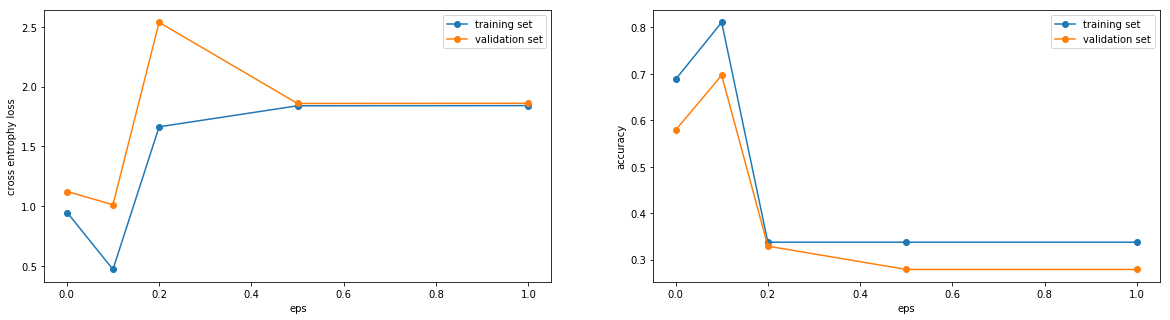

In [45]:
best_eps = train_with_hyper_list(hyperparameters, learning_rates, "eps")

### Comment

As the learning rate increase, within 0.1, the larger the learning rate, the cross entropy was more convergent. However, as the learning rate get bigger 0.1, the cross entropy didn't converge as the learning rate increase. It is due to the fact that, the cross entrophy keep escaping from the global minimum.

In [84]:
hyperparameters["eps"] = best_eps

#### Given the choosen best learning rate, try different momentum.

In [47]:
momentums = [0.0, 0.45, 0.9]

Checking gradients...
Gradient check passed...
Starting trainning...

momentum = 0.0:

CE: Train 0.38254 Validation 1.00641 Test 0.91246
Acc: Train 0.86663 Validation 0.73031 Test 0.71169

Checking gradients...
Gradient check passed...
Starting trainning...

momentum = 0.45:

CE: Train 0.53448 Validation 1.01282 Test 0.96629
Acc: Train 0.80794 Validation 0.69690 Test 0.68312

Checking gradients...
Gradient check passed...
Starting trainning...

momentum = 0.9:

CE: Train 0.30314 Validation 2.07246 Test 2.10522
Acc: Train 0.89923 Validation 0.71599 Test 0.66234

momentum choosen: 0.0


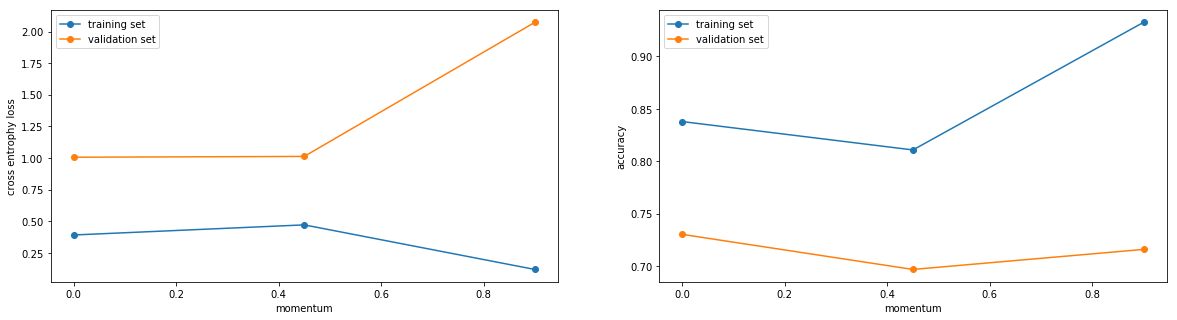

In [48]:
best_momentum = train_with_hyper_list(hyperparameters, momentums, "momentum")

### Comment
As the momentum increases, the convergence of the trainning set doesn't change a lot, but the convergence of the validation set increases. 

In [83]:
hyperparameters["momentum"] = best_momentum

#### Given the choosen best momentum and learning rate, try different mini-batch sizes.

In [59]:
batches = [200, 500, 800, 900, 1000]

Checking gradients...
Gradient check passed...
Starting trainning...

batch_size = 200:

CE: Train 0.66596 Validation 0.97049 Test 0.88406
Acc: Train 0.76378 Validation 0.68019 Test 0.68831

Checking gradients...
Gradient check passed...
Starting trainning...

batch_size = 500:

CE: Train 1.00303 Validation 1.08501 Test 1.08839
Acc: Train 0.63367 Validation 0.62053 Test 0.59221

Checking gradients...
Gradient check passed...
Starting trainning...

batch_size = 800:

CE: Train 1.29053 Validation 1.29646 Test 1.32629
Acc: Train 0.52786 Validation 0.54415 Test 0.52727

Checking gradients...
Gradient check passed...
Starting trainning...

batch_size = 900:

CE: Train 1.01786 Validation 1.07067 Test 1.03939
Acc: Train 0.62596 Validation 0.63246 Test 0.60260

Checking gradients...
Gradient check passed...
Starting trainning...

batch_size = 1000:

CE: Train 0.98664 Validation 1.04708 Test 1.07973
Acc: Train 0.63041 Validation 0.63007 Test 0.62857

batch_size choosen: 200


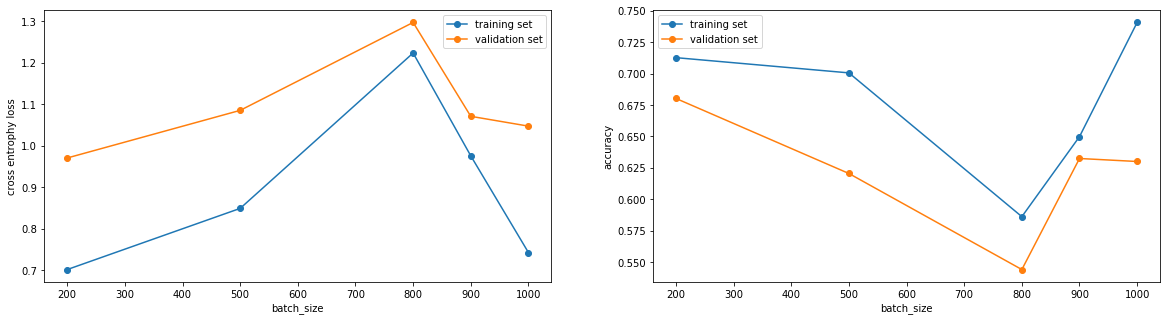

In [60]:
best_batch_size = train_with_hyper_list(hyperparameters, batches, "batch_size")

### Comment
The cross entrophy losses of both training and test set first increase until the batch size reach 800. After 800, the cross entrophy losses start to decrease. However, the accuracy of predicting the label on the validation set is never as high as the when the batch size is 200. It is obvious that, when the batch is 200, the difference of the cross entrophy losses between the validation set and the training set is the greatest. It indicates that the smaller batch size helps to reduce overfit of the model. 

In [85]:
hyperparameters["batch_size"] = best_batch_size

#### When tuning the eps, momentum, and batch size of the network, I first tried different values of learning rate and select the one which yeilded the lowest cross validation error, then fixed the momentum and batch size one by one by fixing the others and trying different values and select the one yielded the lowest cross validation error.

## Q3.3

#### Try 3 different values fo the number of hiddent units

Checking gradients...
Gradient check passed...

Starting trainning...

hiddent_unit = [1, 2]:
CE: Train 1.39660 Validation 1.56225 Test 1.50709
Acc: Train 0.46680 Validation 0.44153 Test 0.44935


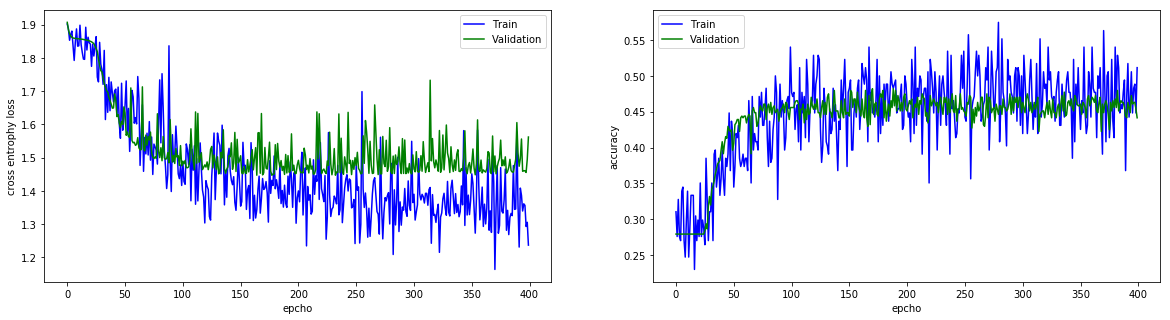


Checking gradients...
Gradient check passed...

Starting trainning...

hiddent_unit = [30, 60]:
CE: Train 0.25548 Validation 1.06624 Test 0.96192
Acc: Train 0.90427 Validation 0.73508 Test 0.70130


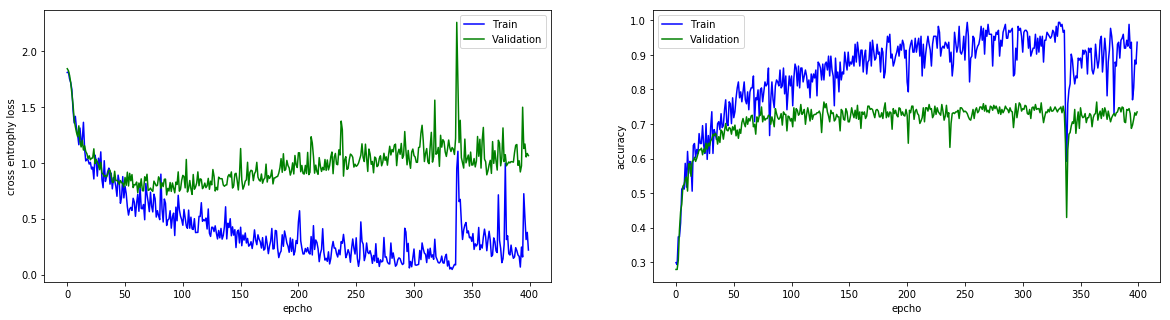


Checking gradients...
Gradient check passed...

Starting trainning...

hiddent_unit = [50, 100]:
CE: Train 0.01521 Validation 1.39853 Test 1.02426
Acc: Train 0.99911 Validation 0.76372 Test 0.77403


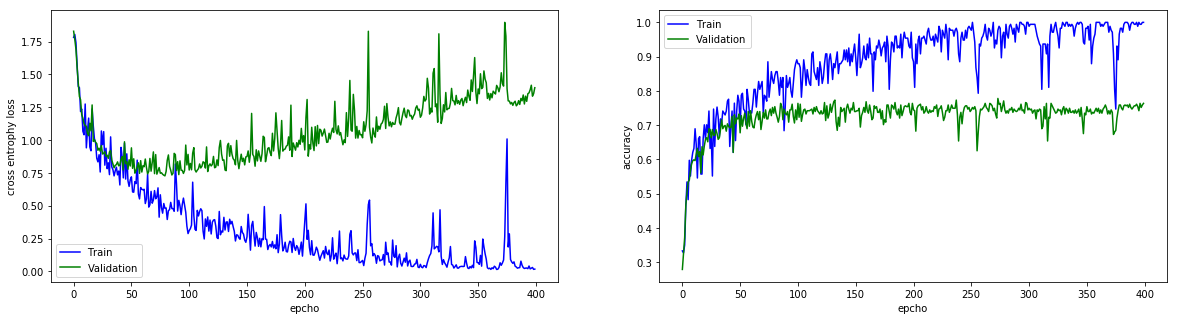

In [82]:
# Fix momentum
hyperparameters["momentum"] = 0.9
# Change learning rate and number of epochs
hyperparameters["eps"] = 0.1
hyperparameters["num_epochs"] = 400
index = 0

hidden_units = [[1, 2], [30, 60], [50, 100]]
for hidden_unit in hidden_units:
    
    # Reinitialize model.
    model = InitNN(num_inputs, hidden_unit, num_outputs)

    # Uncomment to reload trained model here.
    # model = Load(model_fname)

    # Check gradient implementation.
    print('Checking gradients...')
    x = np.random.rand(10, 48 * 48) * 0.1
    CheckGrad(model, NNForward, NNBackward, 'W3', x)
    CheckGrad(model, NNForward, NNBackward, 'b3', x)
    CheckGrad(model, NNForward, NNBackward, 'W2', x)
    CheckGrad(model, NNForward, NNBackward, 'b2', x)
    CheckGrad(model, NNForward, NNBackward, 'W1', x)
    CheckGrad(model, NNForward, NNBackward, 'b1', x)
    print('Gradient check passed...')
    print()
    print('Starting trainning...')
    print()
    print("hiddent_unit" + " = " + str(hidden_unit) + ":")
    # Train model.
    stats = Train(model, NNForward, NNBackward, NNUpdate, hyperparameters, verbose=False, diagram=False)
    %matplotlib inline
    plt.figure(figsize=(20, 5))
    plt.subplot(121)
    train = np.array(stats[1]["train_ce"])
    valid = np.array(stats[1]["valid_ce"])
    plt.plot(train[:, 0], train[:, 1], 'b', label='Train')
    plt.plot(valid[:, 0], valid[:, 1], 'g', label='Validation')
    plt.xlabel("epcho")
    plt.ylabel("cross entrophy loss")
    plt.legend()

    plt.subplot(122)
    train = np.array(stats[1]["train_acc"])
    valid = np.array(stats[1]["valid_acc"])
    plt.plot(train[:, 0], train[:, 1], 'b', label='Train')
    plt.plot(valid[:, 0], valid[:, 1], 'g', label='Validation')
    plt.xlabel("epcho")
    plt.ylabel("accuracy")
    plt.legend()
    plt.draw()
    plt.pause(0.0001)
    print()

### Comment:
The networks with more hidden units have more generality. It can be seen from the fact that the accuarcy on the validation and test set is higher than the network with less hidden units. However, The networks with more hidden unit are more likely to overfit, since the accuracy on the training set is much higher than the accuarcy on the validation set on those networks. The networks with only 3 hidden units is underfittng, and the accuracy difference is very small between the trainning set and validation set.

## Q3.4

In [88]:
# Setup hyperparameters
hyperparameters = {
    "num_hiddens": [16, 32],
    "eps": 0.1,
    "momentum": 0.0,
    "num_epochs": 1000,
    "batch_size": 100
}

# Set everything to the best configuration
hyperparameters["eps"] = best_eps
hyperparameters["momentum"] = best_momentum
hyperparameters["batch_size"] = best_batch_size

In [91]:
# Train the final model
model = InitNN(num_inputs, hyperparameters["num_hiddens"], num_outputs)
stats = Train(model, NNForward, NNBackward, NNUpdate, hyperparameters, verbose=False, diagram=False)

# Load the test data
inputs_train, inputs_valid, inputs_test, target_train, target_valid, \
    target_test = LoadData('./toronto_face.npz')

CE: Train 0.63639 Validation 0.96965 Test 1.16427
Acc: Train 0.76615 Validation 0.71360 Test 0.70130


In [136]:
# Predict label with the given model
y = NNForward(model, inputs_test)['y']

# Transfer the prediction to probabilities
prob = Softmax(y)

# Calculate the score (confidence level) for each sample
scores = np.amax(prob, axis=1)

# Find the unconfident prediction
unconfident = []
for i in range(len(scores)):
    if scores[i] < 0.3:
        unconfident.append(i)


In [137]:
unconfident

[87, 276, 339]

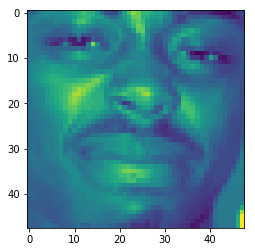

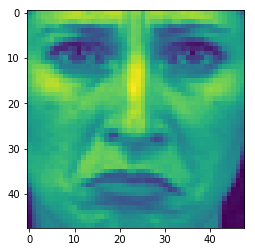

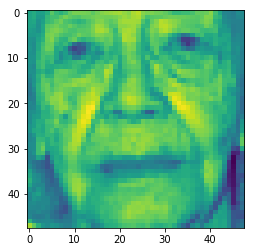

In [138]:
%matplotlib inline
for image_index in unconfident:
    plt.imshow(np.reshape(inputs_test[image_index], newshape=(48,48)))
    plt.pause(0.0001)

### Comment
It is hard even human being to define what emotion the person is in the image. For example, in the first image, It is hard to tell if the person is happy or sad. And for the second image, it hard to tell if the person is angry or sad. Therefore, it is not likely that the network will predict it correctly.